In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

<div class="alert alert-info">
<b>Задание № 0</b>

Найдите минимально необходимый объем выборки для построения интервальной оценки среднего.

- желаемая точность $\Delta$ = 3;
- дисперсия $\sigma^2$  = 225;
- уровень доверия $\beta$ = 0.95.
    
Ответ округлите до целого
</div>

In [2]:
Za = 1.96
delta = 3
disp = 225
sigma = np.sqrt(disp)
n = round(((Za * sigma) / delta)**2, 0)
print(f'Минимально необходимый объем выборки для построения интервальной оценки среднего: {n}')

Минимально необходимый объем выборки для построения интервальной оценки среднего: 96.0


<div class="alert alert-info">
<b>Задание № 1</b>

Постройте `98% доверительный интервал` для среднего значения, если известно, что

- объем выборки n = 25;
- среднее значение по выборке $\overline x$ = 130;
- Из достоверных источников известно стандартное отклонение $\sigma = 15$.
    
В ответ укажите длину полученного доверительного интервала (разницу между правым и левым концом), окруленную до целого
</div>

In [106]:
n_1 = 25
dof_1 = n - 1
mn_1 = 130
sigma_1 = 15
T_1 = 2.492
left_CI = mn_1 - ((sigma_1 / np.sqrt(n_1)) * T_1)
right_CI = mn_1 + ((sigma_1 / np.sqrt(n_1)) * T_1)
L = right_CI - left_CI
print(f'Длина полученного доверительного интервала: {L:.0f}')

Длина полученного доверительного интервала: 15


### 2. Вам даны две выборки роста мужчин и женщин. Докажите, используя t-Тест Стьюдента, что различия между выборками незначительно, если уровень значимости равен 0.001

<div class="alert alert-info">
<b>Задание № 2</b>

Даны две выборки роста мужчин и женщин. 
- Докажите, используя `t-Тест Стьюдента`, что различие между выборками незначительно, если уровень значимости равен $\alpha$ `= 0.001`.
- Покажите различия визуально
</div>

In [118]:
import scipy.stats as st
np.random.seed(42) #фиксация случайности

mens  = st.norm.rvs(loc=171, scale=100, size=150000)  # Выборка мужчин со средним ростом 171
womens = st.norm.rvs(loc=170, scale=100, size=150000)  # Выборка женщин со средним ростом 170
#В двух строчках выше генерируется две выбороки, где loc это среднее значение, а scale это дисперсия

'''Я бы обработал обе выборки изменив рост на мм (1710 и 1700 соответственно) росто так более нагляден, 
а дисперсию заменил на стандартное отклонение в 10, во избежание ошибки, с отрицательным ростом'''

mens_1  = st.norm.rvs(loc=1710, scale=10, size=150000) 
womens_1 = st.norm.rvs(loc=1700, scale=10, size=150000)

stat_2, p_2 = st.ttest_ind(mens_1, womens_1)

if p_2 > 0.001:
    print('Не отклоняем нулевую гипотезу, средние, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, средние, вероятно, различаются')

Отклоняем нулевую гипотезу, средние, вероятно, различаются


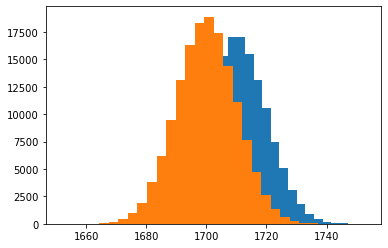

In [119]:
plt.hist(mens_1, bins=30)
plt.hist(womens_1, bins=30)
plt.show()

### 3. Определите объем необходимой выборки для исследования среднего чека за кофе в случайном городе, если известно, что в этом городе стандартное отклонение = 150, уровень доверия = 95%. Погрешность 50 рублей. 

<div class="alert alert-info">
<b>Задание № 3</b>

Определите объем необходимой выборки для исследования среднего чека за кофе в случайном городе если известно, что в этом городе:

- стандартное отклонение $\sigma = 150$;
- уровень доверия $\beta$  = 95%;
- Погрешность $\Delta = 50$ рублей.
</div>

In [3]:
sigma_3 = 150
Za_3 = 1.96
delta_3 = 50
n_3 = ((Za_3 * sigma_3) / delta_3)**2
print(f'Объем необходимой выборки для исследования среднего чека за кофе в случайном городе: {n_3:1.0f}')

Объем необходимой выборки для исследования среднего чека за кофе в случайном городе: 35


<div class="alert alert-info">
<b>Задание № 4</b>

Представьте, что вы хотите разоблачить "волшебника" который считает, что умеет предсказывать погоду на завтра, отвечая просто: дождь или солнце. Вы пронаблюдали за ответами "волшебника" в течении какого-то периода времени и получили некие результаты (см.ниже).

Можно ли сказать, что маг действительно умеет предсказывать погоду? Уровень значимости принять за `0.05` ($\alpha=0.05$).
</div>

In [142]:
observations = pd.DataFrame([[10, 15],[39, 34]],
                            index=['Дождь','Солнце'],
                            columns=['Верные ответы волшебника','Неверные ответы'])
observations

,Верные ответы волшебника,Неверные ответы
Дождь,10,15
Солнце,39,34


In [147]:
# Учтите, что у стат. тестов, в том числе и точного теста Фишера под нулевой гипотезой подразумевается случайность/отсутсвие эффекта
chi, p_4, dof_4, exp = st.chi2_contingency(observations.values)
significance = 0.05
print(f'p-value = {p_4:.6f}, уровень значимости = {significance:.2f}\n')

if p_4 > significance:
    print(f'На уровене значимости {significance:.2f}, мы не отвергаем нулевые гипотезы. Они независимы.')
    print('Наш волшебник, скорее шарлатан!')
else:
    print(f'На уровене значимости {significance:.2f}, мы отвергаем нулевые гипотезы и принимаем H1. Они не независимы.')
    print('Это правда волшебник!')

p-value = 0.353969, уровень значимости = 0.05

На уровене значимости 0.05, мы не отвергаем нулевые гипотезы. Они независимы.
Наш волшебник, скорее шарлатан!


<div class="alert alert-info">
<b>Задание № 5</b> 

Используя функцию mean_confidence_interval(data, confidence), постройте доверительный интервал с уровнем доверия $\beta = 90\%$ для выборки:

</div>

In [148]:
data = [4,5,8,9,6,7,5,6,7,8,5,6,7,0,9,8,4,6,
        7,9,8,6,5,7,8,9,6,7,5,8,6,7,9,5,10]

In [157]:
def mean_confidence_interval(data, confidence=0.95): 
    n = len(data)
    m, se = np.mean(data), st.sem(data)
    h = se * st.t.ppf((1 + confidence)/2, n-1)  #  функция ppf из scipy возвращает нам перцентиль
    return m-h, m, m+h 

left_CI_5, mean_in_CI, right_CI_5 = mean_confidence_interval(data, confidence=0.9)
print(f'Левая граница ДИ: {left_CI_5:.6f}, Правая граница ДИ: {right_CI_5:.6f}')

Левая граница ДИ: 6.073631, Правая граница ДИ: 7.183512


<div class="alert alert-info">
<b>Задание № 6</b>

Принадлежат ли выборки `A` и `B` одному множеству? 
    
- Оцените это с помощью известных вам тестов для проверок статистических гипотез;
- Покажите различия визуально.
</div>

In [158]:
A = [4,5,8,9,6,7,5,6,7,6,8,5,6,7,8,4,
    6,7,9,8,6,5,7,8,6,7,5,6,8,6,7,5,
    4,5,8,9,6,7,5,6,7,6,8,5,6,7,8,4,
    6,7,9,8,6,5,7,8,6,7,5,6,8,6,7,5,
    4,5,8,9,6,7,5,6,7,6,8,5,6,7,8,4,
    6,7,9,8,6,5,7,8,6,7,5,6,8,6,7,5,
    4,5,8,9,6,7,5,6,7,6,8,5,6,7,8,4]

B = [5,6,7,8,4,6,7,2,6,5,7,5,3,5,3,
    5,3,5,5,8,7,6,4,5,3,5,4,6,4,5,3,
    2,6,4,3,5,4,3,4,5,4,3,4,5,4,3,4,
    2,6,4,3,5,4,3,4,5,4,3,4,5,4,3,4,
    3,4,4,1,2,4,3,2,4,3,2,1,5,3,4,6,
    3,2,4,5,6,4,3,3,5,3,4,4,4,2,5,3]

In [183]:
stat_7, p_7 = st.ttest_ind(A, B)
if p_7 > 0.001:
    print('Не отклоняем нулевую гипотезу, средние, вероятно, одинаковые')
else:
    print(f'p-value: {p_7} ниже 0,001. Отклоняем нулевую гипотезу, средние, вероятно, различаются')

p-value: 4.623319592204015e-25 ниже 0,001. Отклоняем нулевую гипотезу, средние, вероятно, различаются


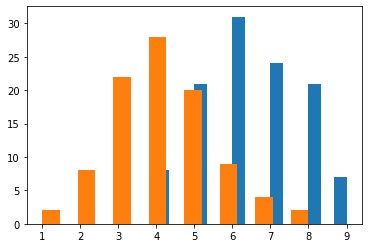

И графике мы видим отчетливое расхождение


In [185]:
plt.hist(A, bins=15)
plt.hist(B, bins=15)
plt.show()
print('И графике мы видим отчетливое расхождение')

<div class="alert alert-info">
<b>Задание № 7 (задание без подвоха)</b>

На примере датасета про жилье в New York City, мы сталкивались с примером, когда переменная имеет не совсем нормальное распределение. 

- Предположим, Вы сформировали две гипотезы:
    - нулевая гипотеза - распределение нормальное;
    - альтернативная гипотеза - распределение ненормальное.
- допустим, вы применили какой-то тест (сейчас неважно какой), который показал уровень значимости  `p-value = 0.03`. Каковы будут ваши выводы? Будем считать что у нас нормальное распределение или все-таки нет?)
    
</div>

Если правильно понимаю, то с высокой вероятность при значениях до 0.1, с крайне высокой до 0.05 и чем ближе к 0, тем выше вероятность, что распределение является нормальным.
Наше значение - 0.03, ответ, с высокой долей вероятности, распределение является нормальным.

<div class="alert alert-info">
<b>Задание № 8</b>
    
Первая выборка — это пациенты, которых лечили препаратом `А`.  Вторая выборка — пациенты, которых лечили препаратом `B`.

Значения в выборках — это некоторая характеристика эффективности лечения (уровень метаболита в крови, температура через три дня после начала лечения, срок выздоровления, число койко-дней, и т.д.) 

- Требуется выяснить, имеется ли значимое различие эффективности препаратов `А` и `B`, или различия являются чисто случайными и объясняются «естественной» дисперсией выбранной характеристики?  (`уровень значимости принять за 0.05 (5%)`)

- При каком минимальном p-value различия были бы уже значимы? 
    
- Если выборки незначительно отличаются, то продемонстрируйте это визуально
</div>

In [4]:
np.random.seed(11)
A = stats.norm.rvs(scale=15, loc=169, size=300)
B = stats.norm.rvs(scale=14, loc=171.4, size=300)
data_frame = pd.DataFrame({'Препарат А': A,
                          'Препарат B': B})
data_frame.head()
# Подсказка, обратите внимание на Two-sample T-test

,Препарат А,Препарат B
0,195.241821,173.214820
1,164.708905,172.199948
2,161.731523,175.303146
3,129.200222,167.842906
4,168.875731,150.405378


In [219]:
stat_8, p_8 = st.ttest_rel(a=A, b=B)

print(f"Статистика = {stat_8:.3f}, p_value = {p_8:.3f}")
if p_8 > 0.05:
    print('Не отклоняем нулевую гипотезу, средние, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, эффективность препаратов различается')

Статистика = -2.035, p_value = 0.043
Отклоняем нулевую гипотезу, эффективность препаратов различается


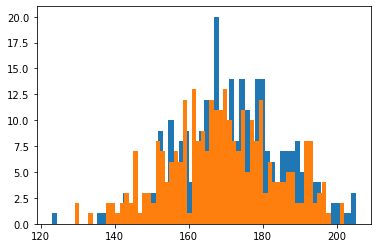

Визуально мы понимаем, что разночтения есть, хотя и прослеживается некоторая корреляция

Если бы значении p=value было менее 0.05 различия будут уменьшаяться, в сторону нулевой гипотезы, а если более 0.05, то наоборот.


In [5]:
plt.hist(B, bins=60)
plt.hist(A, bins=60)
plt.show()
print('Визуально мы понимаем, что разночтения есть, хотя и прослеживается некоторая корреляция\n\nЕсли бы значении p=value было менее 0.05 различия будут уменьшаяться, в сторону нулевой гипотезы, а если более 0.05, то наоборот.')